In [1]:
import csv
import pandas as pd

In [2]:
LABELS_PATH = 'all/labels.csv'

In [3]:
def get_classes(path):
    classes_set = set()
    with open(path) as f:
        reader = csv.DictReader(f)
        for row in reader:
            classes_set.update([row['breed']])
    return classes_set

In [4]:
breeds = list(get_classes(LABELS_PATH))

In [5]:
len(breeds)

120

In [6]:
def get_breed_meta(breeds, path):
    breed_meta_data = {}
    for b in breeds:
        breed_meta_data[b] = {
            'id': [],
            'count': 0
        }
    with open(path) as f:
        reader = csv.DictReader(f)
        for row in reader:
            try:
                (breed_meta_data[row['breed']]['id']).append(row['id'])
                breed_meta_data[row['breed']]['count'] += 1
            except KeyError:
                continue
    return breed_meta_data

In [7]:
meta = get_breed_meta(breeds=breeds,path=LABELS_PATH)

In [8]:
df = pd.DataFrame(data=meta).transpose()

In [9]:
df.sort_values('count',ascending=False)

count  \
scottish_deerhound               126   
maltese_dog                      117   
afghan_hound                     116   
entlebucher                      115   
bernese_mountain_dog             114   
shih-tzu                         112   
great_pyrenees                   111   
pomeranian                       111   
basenji                          110   
samoyed                          109   
airedale                         107   
tibetan_terrier                  107   
leonberg                         106   
cairn                            106   
beagle                           105   
japanese_spaniel                 105   
australian_terrier               102   
blenheim_spaniel                 102   
miniature_pinscher               102   
irish_wolfhound                  101   
lakeland_terrier                  99   
saluki                            99   
papillon                          96   
whippet                           95   
siberian_husky                    95   
norwegian_elkhound                95   
pug                               94   
chow                              93   
italian_greyhound                 92   
pembroke                          92   
...                              ...   
german_short-haired_pointer       75   
boxer                             75   
bull_mastiff                      75   
borzoi                            75   
pekinese                          75   
cocker_spaniel                    74   
american_staffordshire_terrier    74   
doberman                          74   
brittany_spaniel                  73   
malinois                          73   
standard_schnauzer                72   
flat-coated_retriever             72   
redbone                           72   
border_collie                     72   
curly-coated_retriever            72   
kuvasz                            71   
chihuahua                         71   
soft-coated_wheaten_terrier       71   
french_bulldog                    70   
vizsla                            70   
tibetan_mastiff                   69   
german_shepherd                   69   
giant_schnauzer                   69   
walker_hound                      69   
otterhound                        69   
golden_retriever                  67   
brabancon_griffon                 67   
komondor                          67   
briard                            66   
eskimo_dog                        66   

                                                                               id  
scottish_deerhound              [0042188c895a2f14ef64a918ed9c7b64, 01e787576c0...  
maltese_dog                     [00693b8bc2470375cc744a6391d397ec, 022b34fd873...  
afghan_hound                    [0379145880ad3978f9b80f0dc2c03fba, 059a86d5063...  
entlebucher                     [01ee3c7ff9bcaba9874183135877670e, 021b5a49189...  
bernese_mountain_dog            [02d54f0dfb40038765e838459ae8c956, 03e1d2ee5fd...  
shih-tzu                        [0162b3e0144fb1d1ab82fbff3ace9938, 035f28d8ad3...  
great_pyrenees                  [055cfac66e5d67756ab05d02baeeb04c, 06ab2182c2a...  
pomeranian                      [0779e164a5bed1119e36e622107c6a77, 08098e0a407...  
basenji                         [003df8b8a8b05244b1d920bb6cf451f9, 04b5834c3a9...  
samoyed                         [01b36cb1b80ab8c3a7d2b7128ad21bdc, 041b3b8a40b...  
airedale                        [0267c5f1acbab52ae4a7927e0398612b, 02c90d8109d...  
tibetan_terrier                 [013f8fdf6d638c7bb042f5f17e8a9fdc, 07eeb2ef42c...  
leonberg                        [0287b3374c33346e2b41f73af3a36261, 02a8ed20109...  
cairn                           [00bee065dcec471f26394855c5c2f3de, 0365fe4e3e1...  
beagle                          [0566a60d7504a6fad4161d0ef2765a34, 0b9d58d8d26...  
japanese_spaniel                [071652f5f5d0bf00983c075e96ad725f, 080ec59213e...  
australian_terrier              [0192d7174233ebdb3d720000413829ac, 05c128c8e3e...  
blenheim_spaniel                [08af5

In [10]:
#Classes to be considered
BREEDS = ['labrador_retriever','pug','german_shepherd', 'pomeranian','doberman','bull_mastiff',
          'beagle','rottweiler','boxer','golden_retriever']

In [11]:
meta = get_breed_meta(BREEDS,LABELS_PATH)

In [12]:
df = pd.DataFrame(data=meta).transpose()
df.sort_values('count',ascending=False)

count                                                 id
pomeranian           111  [0779e164a5bed1119e36e622107c6a77, 08098e0a407...
beagle               105  [0566a60d7504a6fad4161d0ef2765a34, 0b9d58d8d26...
pug                   94  [023e4e28415506e0deddcbd8f8bdab29, 02508e76981...
labrador_retriever    84  [00cc68a50b2d016a6b29af628ea4e04b, 07ebe25829d...
rottweiler            76  [118089e60763cbdba239cac747a54a6e, 11f1e40f11c...
boxer                 75  [008887054b18ba3c7601792b6a453cc3, 025bab46ddc...
bull_mastiff          75  [02ad779f2721db9364d3bb68f5580582, 02d45a23862...
doberman              74  [008b1271ed1addaccf93783b39deab45, 046d8f04a5a...
german_shepherd       69  [016bcdb05e2d0e0878877df21b8c3cff, 01b09bdac59...
golden_retriever      67  [0021f9ceb3235effd7fcde7f7538ed62, 00a366d4b4a...

In [13]:
from os import mkdir, listdir, remove
import shutil

In [14]:
def make_breed_dir(path,breeds):
    for b in breeds:
        mkdir(path+'/'+b)

In [15]:
#make_breed_dir('all/train',BREEDS)

In [16]:
def move_images_to_dir(source_path,meta, breeds):
    for b in breeds:
        file_ids = meta[b]['id']
        for id in file_ids:
            try:
                shutil.copy(source_path+'/'+id+'.jpg',source_path+'/'+b+'/'+id+'.jpg')
            except FileNotFoundError:
                continue

In [17]:
#move_images_to_dir('all/train',meta,BREEDS)

In [18]:
def del_unwanted_images(path, exclude):
    files = listdir(path)
    for i in exclude:
        files.remove(i)
    
    for f in files:
        remove(path+f)
    

In [19]:
#del_unwanted_images('all/train/',BREEDS)

In [20]:
from keras.layers import Conv2D,Flatten,Dense, Dropout, MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [21]:
#creating VGG-net like model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

adam = Adam(lr=0.001)
model.compile(adam,loss='categorical_crossentropy',metrics=['acc'])

In [22]:
#generating image data
from keras.preprocessing.image import ImageDataGenerator

In [23]:
image_generator1 = ImageDataGenerator(rotation_range=45,
                                     rescale=1.0/255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

image_generator2 = ImageDataGenerator(rescale=1.0/255,)

In [24]:
train_generator = image_generator1.flow_from_directory('all/train',target_size=(100,100),batch_size=100)
validation_generator = image_generator2.flow_from_directory('all/train',target_size=(100,100),batch_size=100)

Found 830 images belonging to 10 classes.
Found 830 images belonging to 10 classes.


In [25]:
#model.fit_generator(train_generator,steps_per_epoch=1000,epochs=3,validation_data=validation_generator)

In [26]:
#model.save('saved_model/doggo_classifier_2')

In [27]:
from keras.models import load_model
model = load_model('saved_model/doggo_classifier_2')

In [28]:
train_generator.class_indices

{'beagle': 0,
 'boxer': 1,
 'bull_mastiff': 2,
 'doberman': 3,
 'german_shepherd': 4,
 'golden_retriever': 5,
 'labrador_retriever': 6,
 'pomeranian': 7,
 'pug': 8,
 'rottweiler': 9}

In [31]:
test_generator = ImageDataGenerator(rescale=1.0/255,)
test_generator = test_generator.flow_from_directory('all/test2',target_size=(100,100),batch_size=100)

Found 4 images belonging to 1 classes.


In [32]:
X = test_generator.next()

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

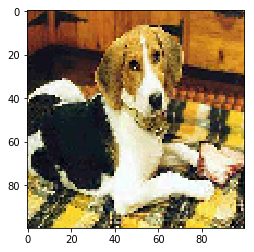

In [34]:
plt.imshow(X[0][1])

In [37]:
model.predict(X[0])[1]

array([1.0000000e+00, 3.0255778e-10, 1.3606305e-13, 3.9441405e-14,
       2.5577654e-20, 9.7264525e-22, 1.0033879e-18, 2.3070985e-23,
       4.2977975e-16, 2.1078643e-09], dtype=float32)

In [38]:
train_generator.class_indices

{'beagle': 0,
 'boxer': 1,
 'bull_mastiff': 2,
 'doberman': 3,
 'german_shepherd': 4,
 'golden_retriever': 5,
 'labrador_retriever': 6,
 'pomeranian': 7,
 'pug': 8,
 'rottweiler': 9}

In [29]:
model.save('saved_model/doggo_classifier_2_woo',include_optimizer=False)